  
compile, optimizer = sgd  
compile, loss = mse   

- 데이터 샘플 생성방법  
- 데이터 샘플의 갯수  
- epoch의 수    
-- epochs :   
- hidden layer의 수  
- 각 hidden layer의 neuron의 수   
-- hid_neu = 16   
- activation 함수 선정  
-- Hidden Layer, Activation = sigmoid  
-- Output Layer, Activation = relu 


# https://www.tensorflow.org/api_docs/python/tf/keras 
## 여기 설명참고해서 여러가지 activations와 losses, optimizers 사용해보았습니다.

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 72.7855 - val_loss: 7.2807
Epoch 2/20
700/700 - 0s - loss: 6.5378 - val_loss: 5.6814
Epoch 3/20
700/700 - 0s - loss: 5.1108 - val_loss: 4.2307
Epoch 4/20
700/700 - 0s - loss: 3.7224 - val_loss: 2.9720
Epoch 5/20
700/700 - 0s - loss: 2.5430 - val_loss: 1.9384
Epoch 6/20
700/700 - 0s - loss: 1.5987 - val_loss: 1.1802
Epoch 7/20
700/700 - 0s - loss: 0.9673 - val_loss: 0.6981
Epoch 8/20
700/700 - 0s - loss: 0.5540 - val_loss: 0.4197
Epoch 9/

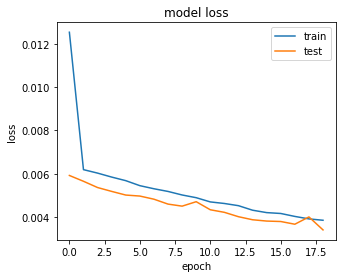

train loss= 0.0038574437832548506
test loss= 0.0034117579822325046



y actual value =  23.3
y predicted value = 28.593374



77.2817 %
1.82 초


In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import time

# y = a+ bx1 + cx2 ^2 + dx3^3 + e

def generator_sequential_model(hid_neu = 16, act_hid='sigmoid', act_out='relu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'mse')    
    return model 

def generator_nonlinear_regression_dataset(numofsamples = 1000,a = 1, b =3, c=5, d = 10, e=20 ):
    np.random.seed(0)
    X = np.random.rand(numofsamples,4)         # 입력값 만큼 랜덤으로 input data생성
    X[:,0]= 1
    X[:,2] = np.square(X[:,2])
    X[:,3] = np.power(X[:,3],3)
    
    coef = np.array([a,b,c,d])
    bias = e
    y = np.matmul(X,coef.transpose()) + bias
    return X, y

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    plt.show()
    
def predict_new_sample(model,x ,a = 1, b =3, c=5, d = 10, e=20):
    x= x.reshape(1,4)
    y_pred = model.predict(x)[0][0]
    y_actual = a*x[0][0]**0 + b*x[0][1] + c*(x[0][2]**2) + d*(x[0][3]**3) + e
    return y_pred, y_actual

def fit_and_time(epochs =40):
    start_time = time.time()
    history = model.fit(X, y,epochs=epochs, batch_size=16,verbose =2 , validation_split = 0.3)
    end_time = time.time()
    fitting = round(end_time - start_time,2)
    return fitting , history

def total_print() :
    print("train loss=", history.history['loss'][-1])
    print("test loss=",  history.history['val_loss'][-1])
    print('\n'*2)
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    print('\n'*2)
    accuracy = 1 - (abs(y_pred-y_actual)/y_actual)
    print(round(100*accuracy,4), '%')
    print(fitting,'초')


model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, histroy = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()

------------------------------------------------  

loss = 'msle' 수정

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 4.8451 - val_loss: 3.1274
Epoch 2/40
700/700 - 0s - loss: 2.6486 - val_loss: 2.1926
Epoch 3/40
700/700 - 0s - loss: 1.9733 - val_loss: 1.7128
Epoch 4/40
700/700 - 0s - loss: 1.5842 - val_loss: 1.4053
Epoch 5/40
700/700 - 0s - loss: 1.3212 - val_loss: 1.1870
Epoch 6/40
700/700 - 0s - loss: 1.1287 - val_loss: 1.0225
Epoch 7/40
700/700 - 0s - loss: 0.9806 - val_loss: 0.8933
Epoch 8/40
700/700 - 0s - loss: 0.8626 - val_loss: 0.7891
Epoch 9/40

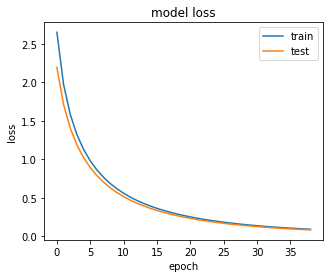

train loss= 0.09331737377813884
test loss= 0.08495531439781188



y actual value =  23.3
y predicted value = 18.972763



81.4282 %
3.09 초


In [2]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')




------------------------------------------------  

opimizer = 'adam' 수정

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 9.7386 - val_loss: 8.6717
Epoch 2/40
700/700 - 0s - loss: 8.0516 - val_loss: 7.3382
Epoch 3/40
700/700 - 0s - loss: 6.9070 - val_loss: 6.3690
Epoch 4/40
700/700 - 0s - loss: 6.0431 - val_loss: 5.6141
Epoch 5/40
700/700 - 0s - loss: 5.3573 - val_loss: 5.0033
Epoch 6/40
700/700 - 0s - loss: 4.7960 - val_loss: 4.4991
Epoch 7/40
700/700 - 0s - loss: 4.3284 - val_loss: 4.0746
Epoch 8/40
700/700 - 0s - loss: 3.9327 - val_loss: 3.7130
Epoch 9/40

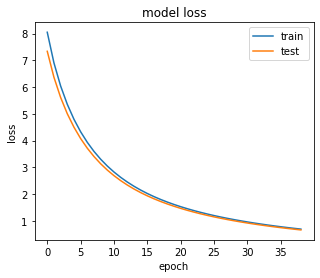

train loss= 0.6866618868282863
test loss= 0.6563136124610901



y actual value =  23.3
y predicted value = 10.962761



47.0505 %
3.27 초


In [3]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'adam', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

------------------------------------------------  

opimizer = 'adadelta' 수정

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 10.8465 - val_loss: 10.7590
Epoch 2/40
700/700 - 0s - loss: 10.8423 - val_loss: 10.7547
Epoch 3/40
700/700 - 0s - loss: 10.8379 - val_loss: 10.7502
Epoch 4/40
700/700 - 0s - loss: 10.8334 - val_loss: 10.7456
Epoch 5/40
700/700 - 0s - loss: 10.8287 - val_loss: 10.7408
Epoch 6/40
700/700 - 0s - loss: 10.8238 - val_loss: 10.7359
Epoch 7/40
700/700 - 0s - loss: 10.8188 - val_loss: 10.7308
Epoch 8/40
700/700 - 0s - loss: 10.8136 - val_loss: 10

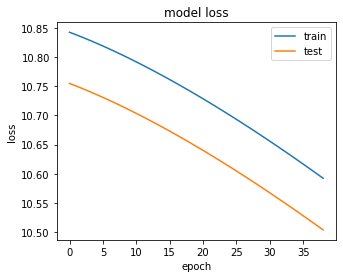

train loss= 10.592308365958077
test loss= 10.50391352335612



y actual value =  23.3
y predicted value = 0.061213955



0.2627 %
2.85 초


In [4]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'adadelta', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

------------------------------------------------  

opimizer = 'adagrad' 수정

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 10.4268 - val_loss: 10.1002
Epoch 2/40
700/700 - 0s - loss: 10.0392 - val_loss: 9.8265
Epoch 3/40
700/700 - 0s - loss: 9.8058 - val_loss: 9.6277
Epoch 4/40
700/700 - 0s - loss: 9.6262 - val_loss: 9.4671
Epoch 5/40
700/700 - 0s - loss: 9.4771 - val_loss: 9.3304
Epoch 6/40
700/700 - 0s - loss: 9.3483 - val_loss: 9.2105
Epoch 7/40
700/700 - 0s - loss: 9.2342 - val_loss: 9.1033
Epoch 8/40
700/700 - 0s - loss: 9.1313 - val_loss: 9.0058
Epoch 9

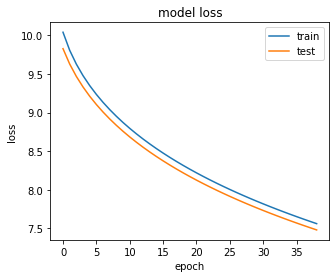

train loss= 7.560768119267055
test loss= 7.479678064982096



y actual value =  23.3
y predicted value = 0.75521874



3.2413 %
3.31 초


In [5]:
def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'adagrad', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

------------------------------------------------  

opimizer = 'Ftrl' 수정

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 10.4778 - val_loss: 10.1578
Epoch 2/40
700/700 - 0s - loss: 10.0995 - val_loss: 9.8895
Epoch 3/40
700/700 - 0s - loss: 9.8707 - val_loss: 9.6942
Epoch 4/40
700/700 - 0s - loss: 9.6942 - val_loss: 9.5360
Epoch 5/40
700/700 - 0s - loss: 9.5474 - val_loss: 9.4013
Epoch 6/40
700/700 - 0s - loss: 9.4205 - val_loss: 9.2829
Epoch 7/40
700/700 - 0s - loss: 9.3078 - val_loss: 9.1769
Epoch 8/40
700/700 - 0s - loss: 9.2061 - val_loss: 9.0805
Epoch 9

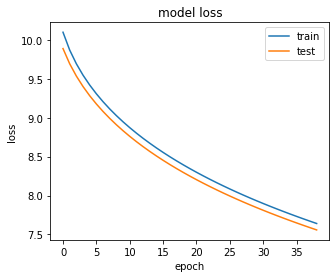

train loss= 7.640140345437186
test loss= 7.557572104136149



y actual value =  23.3
y predicted value = 0.7317777



3.1407 %
2.9 초


In [6]:


def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'sigmoid', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'relu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'Ftrl', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

------------------------------------------------  

activation = 'selu' 수정
activation = 'elu' 수정

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 6.1097 - val_loss: 3.5101
Epoch 2/40
700/700 - 0s - loss: 2.6549 - val_loss: 1.9602
Epoch 3/40
700/700 - 0s - loss: 1.6285 - val_loss: 1.3036
Epoch 4/40
700/700 - 0s - loss: 1.1304 - val_loss: 0.9384
Epoch 5/40
700/700 - 0s - loss: 0.8345 - val_loss: 0.7068
Epoch 6/40
700/700 - 0s - loss: 0.6395 - val_loss: 0.5484
Epoch 7/40
700/700 - 0s - loss: 0.5027 - val_loss: 0.4346
Epoch 8/40
700/700 - 0s - loss: 0.4025 - val_loss: 0.3499
Epoch 9/40

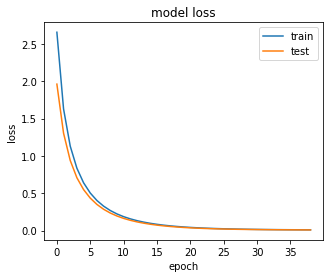

train loss= 0.0098465605239783
test loss= 0.008813278985520204



y actual value =  23.3
y predicted value = 22.483116



96.4941 %
3.39 초


In [7]:


def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'elu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

------------------------------------------------  

activation = 'selu' 수정  
activation = 'selu' 수정  




Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/40
700/700 - 0s - loss: 5.9241 - val_loss: 3.3407
Epoch 2/40
700/700 - 0s - loss: 2.5161 - val_loss: 1.8479
Epoch 3/40
700/700 - 0s - loss: 1.5308 - val_loss: 1.2203
Epoch 4/40
700/700 - 0s - loss: 1.0558 - val_loss: 0.8730
Epoch 5/40
700/700 - 0s - loss: 0.7750 - val_loss: 0.6540
Epoch 6/40
700/700 - 0s - loss: 0.5908 - val_loss: 0.5049
Epoch 7/40
700/700 - 0s - loss: 0.4623 - val_loss: 0.3982
Epoch 8/40
700/700 - 0s - loss: 0.3686 - val_loss: 0.3192
Epoch 9/4

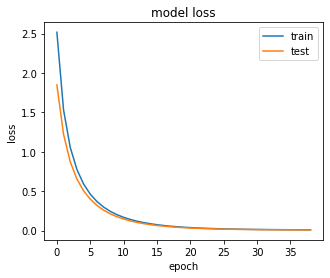

train loss= 0.00934247758771692
test loss= 0.008425640780478716



y actual value =  23.3
y predicted value = 22.640867



97.1711 %
3.17 초


In [26]:

def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(16, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'selu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y =generator_nonlinear_regression_dataset(numofsamples = 1000)
start_time = time.time()
history = model.fit(X, y,epochs =40,  batch_size=16 ,verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))

print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)

print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

------------------------------------------------  

activation = 'selu' 수정  
activation = 'selu' 수정  


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 24)                120       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 25        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
Train on 10500 samples, validate on 4500 samples
Epoch 1/20
10500/10500 - 0s - loss: 3.4064 - val_loss: 1.3123
Epoch 2/20
10500/10500 - 0s - loss: 0.8656 - val_loss: 0.5622
Epoch 3/20
10500/10500 - 0s - loss: 0.4170 - val_loss: 0.3013
Epoch 4/20
10500/10500 - 0s - loss: 0.2355 - val_loss: 0.1787
Epoch 5/20
10500/10500 - 0s - loss: 0.1443 - val_loss: 0.1127
Epoch 6/20
10500/10500 - 0s - loss: 0.0932 - val_loss: 0.0743
Epoch 7/20
10500/10500 - 0s - loss: 0.0627 - val_loss: 0.0508
Epoch 8/20
10500/10500 - 0s - loss

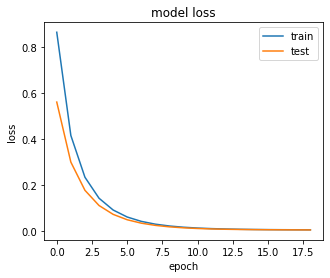

train loss= 0.007017701194577274
test loss= 0.006625350844115019



y actual value =  23.3
y predicted value = 23.145664



99.3376 %
3.42 초


In [27]:

def generator_sequential_model():

    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(24, activation = 'selu', name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = 'selu', name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    
    model.summary()
#     print(model.layers[0].get_weights())                      # 위에서 weight값 고정시켰기때문에 고정된 weight값 출력이 된다.
#     print(model.layers[1].get_weights())
    model.compile(optimizer = 'sgd', loss = 'msle')    
    return model 

model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(numofsamples = 15000)
start_time = time.time()
history = model.fit(X, y,epochs =20, batch_size=100 ,  verbose =2 , validation_split = 0.3)
end_time = time.time()
plot_loss_curve(history)

y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))


print("train loss=", history.history['loss'][-1])
print("test loss=",  history.history['val_loss'][-1])
print('\n'*2)
print('y actual value = ', y_actual)
print('y predicted value =', y_pred)
print('\n'*2)
print(round(100*y_pred/y_actual,4), '%')
print(round(end_time - start_time,2),'초')

